## Analyzing House Sales in a Northwestern County Using Multiple Linear Regression Modeling

![](Data/img1.jpg)

Photo by <a href="https://unsplash.com/@jimmy_conover?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Jimmy Conover</a> on <a href="https://unsplash.com/s/photos/neighborhood?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

#### Overview

In this project, we will apply statistical analytic methods to comprehend the variables affecting home sales in a certain county in the northwest.  Statistical analyses take into account the inherent uncertainty in data. They provide measures of uncertainty, such as p-values, confidence intervals, and standard errors, which allow us to assess the reliability and robustness of our findings.This study intends to investigate the links between numerous independent variables and the dependent variable of home sales by using multiple linear regression modeling.We will be using regression coefficients because they provide specific numerical values that quantify the relationship between the independent variables and the dependent variable.

Overall, this analysis aims to advance knowledge and comprehension of the northwest county's housing market by illuminating the variables that have a significant impact on sales and possibly assisting various stakeholders in streamlining their strategies and decision-making procedures.

#### Business Understanding

The primary objective of a real estate company that specializes in helping homeowners buy and sell homes is to offer beneficial services that aid homeowners in maximizing the value of their properties. A significant business problem to address is to be able to advise clients on house modifications and their potential impact on the assessed worth of their homes.

In resolving this business issue, it is important to take into account:

1.Data Analysis and Research: To identify the renovations that significantly affect the value of homes, the agency must perform extensive data analysis and research. To ascertain which renovations produce the most return on investment, this entails reviewing market trends, historical sales data, and the local real estate market.

2.Building a Renovation Value Model: It's important to build a solid renovation value model. This model should take into account a number of variables, including the type of renovation, the associated costs, the state of the local market, and historical information on property value increases following renovations. The model needs to be customized for the particular market that the agency serves.

3.Communication and Education: It's crucial to convince homeowners of the benefits of house remodeling. To educate homeowners about the potential advantages of particular renovations and share customer success stories, the firm could create instructional resources like manuals, blog posts, or seminars.

4.Continuous Evaluation and Improvement: The agency needs to keep an eye on the market and assess how well its refurbishment recommendations and predicted value increases are working. The remodeling value model will be improved with the help of this feedback loop, which will also guarantee that the agency's services are current and useful.

In order to establish itself as a trusted partner for homeowners,the real estate firm must meet the need for renovation guidance and anticipated value increases. Increased client happiness and a solid reputation in the market might result from this.

#### Data Understanding


The data is derived from Kaggle which is an online community platform for data scientists and machine learning enthusiasts.You can upload your datasets to Kaggle and download others' datasets as well.In order to gain insights into the dataset that will be used for the analysis,here are some steps to consider:

1.Importing the data:
Here we will load the dataset with python library pandas.We will also be importing the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv("Data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


2.Examine the Data Structure: Here we will be reviewing the structure of the dataset by checking the number of rows and columns.We will also be identifying the data types of the variables ie. the columns and see whether they are numeric or categorical and identify the target variable (dependent variable) and predictor variables (independent variables) for the linear regression analysis.

In [2]:
data.shape

(21597, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Here we can see some of the categorical data are in form of strings denoted by object Dtype and the numerical are in form of int64 or float64. But not all int64/float64 Dtype are numerical because we have for instance yr_built which is a categorical Dtype but it is expressed in int64/float64.We can also see that sqft_basement is expressed as strings  instead of numeric which we will fix later on.

Some of the categorical data we have include: id,date,waterfront,view,condition,grade,yr_built,   yr_renovated,zipcode

In choosing the target variable, we will go with price because by modeling and predicting the price, real estate agencies can provide homeowners and buyers with estimates of the fair market value of a property. This information is essential for informed decision-making during property transactions.

In choosing the dependable/predictor variables we carry out a corrleation test against the target variable to see which dependable variables we can use.

In [4]:
# Calculate the correlation of target column with other columns
target_column = 'price'  
correlations = data.corr()[target_column]
print(correlations)

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64


C:\Users\mjeff\AppData\Local\Temp\ipykernel_8944\237414460.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()[target_column]


Since correlation is a measure related to regression modeling, we can see that there seems to be some relevant signal here, with some of the variables having medium-to-strong correlations with price.eg sqft_living(Square footage of living space in the home), sqft_above(Square footage of house apart from basement) and sqft_living15(The square footage of interior housing living space for the nearest 15 neighbors)

3.Explore the Descriptive Statistics:Here we will display the summary statistics for all variables.

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Count: The count of non-null values in each column. It gives you an idea of missing values or potential data quality issues.

Mean: The average value of each column. It provides a measure of central tendency and can give you a sense of the typical value.

Standard Deviation: The measure of the spread or variability of each column's values around the mean. It indicates how dispersed the data points are.

Minimum and Maximum: The smallest and largest values in each column. It gives you the range of the data and helps identify potential outliers.

Quartiles (25%, 50%, and 75%): These values divide the data into four equal parts. The 50th percentile (median) represents the middle value, while the 25th and 75th percentiles indicate the lower and upper quartiles, respectively. They provide insights into the data's distribution and skewness.

#### Data Preparation

1.Data Cleaning: Here we start by checking and cleaning the dataset to handle any missing values. This step ensures that your data is in a suitable form for analysis.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#replacing null values with suitable replacements
data['waterfront'] = data['waterfront'].fillna('UNKNOWN')
data['view'] = data['view'].fillna('UNKNOWN')
median_year = data['yr_renovated'].median()
data['yr_renovated'] = data['yr_renovated'].fillna(median_year)


In [8]:
# Convert the column sqft_basement to numeric data type, replacing non-convertible values with NaN
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')
# Calculate the mean of the converted values
mean_value = data['sqft_basement'].mean()
# Replace NaN values with the mean
data['sqft_basement'] = data['sqft_basement'].fillna(mean_value)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

2.Feature Selection: Identify the relevant features (independent variables) that may have a significant impact on the target variable (dependent variable).

In [9]:
data.corr()['price']

C:\Users\mjeff\AppData\Local\Temp\ipykernel_8944\2971354294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
sqft_basement    0.322192
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

Some of the variables exhibiting medium to high correlation include : sqft_living,sqft_above,sqft_living15,bathrooms

3.Data transformation and handling Categorical Variables: Here we are converting square foot to square meters because square meters align with the metric system, which is widely used in scientific research, engineering, and many other fields. Using square meters can provide consistency when working with other metric measurements and calculations.

In [10]:
#transforming from imperial to metric
data['sqft_living'] = data['sqft_living']*0.092903
data = data.rename(columns={'sqft_living': 'sqm_living'})

data['sqft_basement'] = data['sqft_basement']*0.092903
data = data.rename(columns={'sqft_basement': 'sqm_basement'})

data['sqft_lot'] = data['sqft_lot']*0.092903
data = data.rename(columns={'sqft_lot': 'sqm_lot'})

data['sqft_above'] = data['sqft_above']*0.092903
data = data.rename(columns={'sqft_above': 'sqm_above'})

data['sqft_living15'] = data['sqft_living15']*0.092903
data = data.rename(columns={'sqft_living15': 'sqm_living15'})

data['sqft_lot15'] = data['sqft_lot15']*0.092903
data = data.rename(columns={'sqft_lot15': 'sqm_lot15'})


Here we need to encode or transform categorical variables into numerical values that can be used in the regression model.This involve techniques like one-hot encoding, label encoding, or creating dummy variables.

In [11]:
#handling categorical variables by creating dummy variables
y = data['price']
cnd_dmy = data[["floors","condition","grade"]].copy()
cnd_dmy = pd.get_dummies(cnd_dmy, columns=["condition","grade"], drop_first=True)
cnd_dmy.head() 

,floors,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


4.Handling Multicollinearity: Check for multicollinearity among the independent variables, which occurs when two or more variables are highly correlated.

In [12]:
y = data['price']
df2 = data[['sqm_living','sqm_above','floors','sqm_basement','bedrooms','bathrooms','yr_built','yr_renovated','sqm_lot','sqm_living15','sqm_lot15']]
df2.corr()

,sqm_living,sqm_above,floors,sqm_basement,bedrooms,bathrooms,yr_built,yr_renovated,sqm_lot,sqm_living15,sqm_lot15
sqm_living,1.000000,0.876448,0.353953,0.430190,0.578212,0.755758,0.318152,0.051060,0.173453,0.756402,0.184342
sqm_above,0.876448,1.000000,0.523989,-0.051781,0.479386,0.686668,0.424037,0.020645,0.184139,0.731767,0.195077
floors,0.353953,0.523989,1.000000,-0.242359,0.177944,0.502582,0.489193,0.003793,-0.004814,0.280102,-0.010722
sqm_basement,0.430190,-0.051781,-0.242359,1.000000,0.299037,0.279541,-0.131202,0.066204,0.015293,0.199577,0.016420
bedrooms,0.578212,0.479386,0.177944,0.299037,1.000000,0.514508,0.155670,0.017900,0.032471,0.393406,0.030690
bathrooms,0.755758,0.686668,0.502582,0.279541,0.514508,1.000000,0.507173,0.047177,0.088373,0.569884,0.088303
yr_built,0.318152,0.424037,0.489193,-0.131202,0.155670,0.507173,1.000000,-0.202555,0.052946,0.326377,0.070777
yr_renovated,0.051060,0.020645,0.003793,0.066204,0.017900,0.047177,-0.202555,1.000000,0.004979,0.000683,0.004286
sqm_lot,0.173453,0.184139,-0.004814,0.015293,0.032471,0.088373,0.052946,0.004979,1.000000,0.144763,0.718204
sqm_living15,0.756402,0.731767,0.280102,0.199577,0.393406,0.569884,0.326377,0.000683,0.144763,1.000000,0.183515


In handling multicollinearity we can have several combinations of the variables but we can not have the following pairs in the same model because they exhibit high correlation with one another.The pair include: sqm_living/bathrooms , sqm_lot/sqm_lot15 , sqm_above/sqm_living , sqm_living15/sqm_living and sqm_living15/sqm_above.

In [13]:
#creating a dataframe that holds the independent variable matrix
df4 = data[['sqm_above','sqm_basement','floors','bathrooms','yr_built','yr_renovated']]
df4.corr()

,sqm_above,sqm_basement,floors,bathrooms,yr_built,yr_renovated
sqm_above,1.000000,-0.051781,0.523989,0.686668,0.424037,0.020645
sqm_basement,-0.051781,1.000000,-0.242359,0.279541,-0.131202,0.066204
floors,0.523989,-0.242359,1.000000,0.502582,0.489193,0.003793
bathrooms,0.686668,0.279541,0.502582,1.000000,0.507173,0.047177
yr_built,0.424037,-0.131202,0.489193,0.507173,1.000000,-0.202555
yr_renovated,0.020645,0.066204,0.003793,0.047177,-0.202555,1.000000


#### Modeling

First we will start with a simple linear regression model.

In [14]:
#baseline model
X_baseline = data[['sqm_above']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

We can thereafter add another independent variable.

In [15]:
#iterated model
X_multi1 = data[['sqm_above','bedrooms']]
X_multi1_model = sm.OLS(y, sm.add_constant(X_multi1))
X_multi1_results = X_multi1_model.fit()

In [16]:
#final model
#df4 = data[['sqm_above','sqm_basement','floors','bathrooms','yr_built','yr_renovated']]
X_multi2_model = sm.OLS(y, sm.add_constant(df4))
X_multi2_results = X_multi2_model.fit()

In [17]:
cnd_dmy.head()

,floors,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
#additional model where we are modeling with dummy variables created 
#we are using dummy variables created from conditions in cnd_dmy

df6 = cnd_dmy[['floors','condition_Poor','condition_Fair','condition_Very Good']]
multi6_model = sm.OLS(y, sm.add_constant(cnd_dmy))
multi6_results = multi6_model.fit()

#### Regression results

In [19]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:48   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.0

The baseline model built was:

price = 59,760 + 2891.92sqm_above 

The model is statistically significant overall, with an F-statistic p-value below 0.05

The model explains about 36.6% of the variance in price

The model coefficients (const, sqm_above) are all statistically significant, with t-statistic p-values below 0.05

For each increase of meter squared in house apart from basement, we see an associated increase in price of about $2891.92


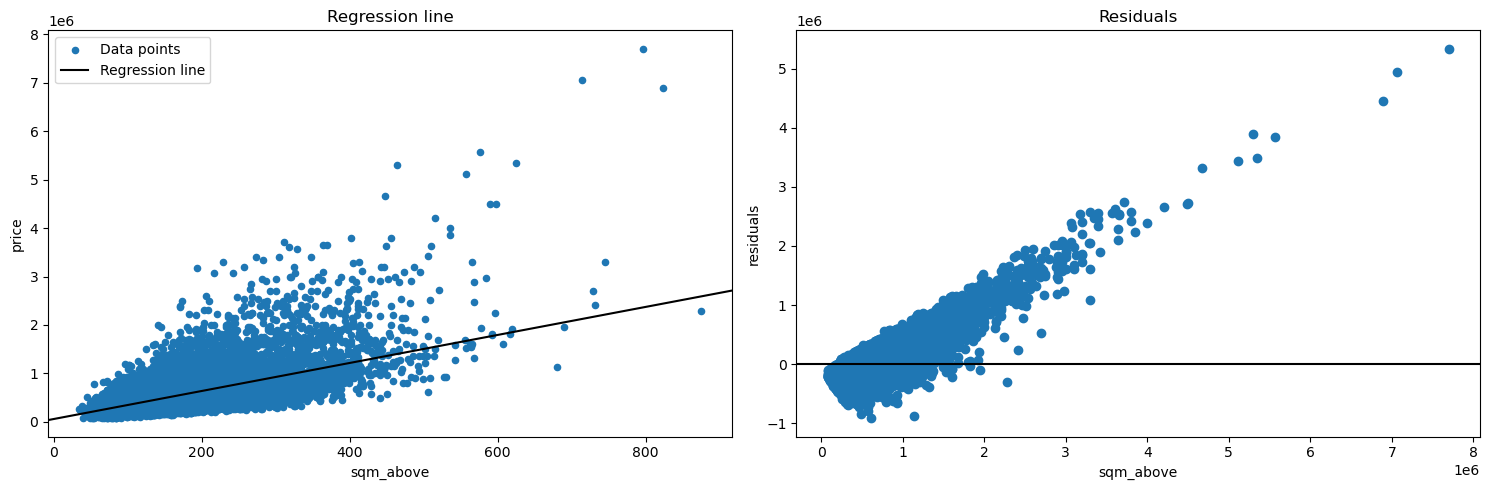

In [20]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(15, 5))
data.plot.scatter(x="sqm_above", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.set_title('Regression line')
ax.legend()

ax2.scatter(data["price"], baseline_results.resid)
ax2.axhline(y=0, color="black")
ax2.set_xlabel("sqm_above")
ax2.set_ylabel("residuals")
ax2.set_title('Residuals')

plt.tight_layout()

plt.show()

In [21]:
print(X_multi1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     6258.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:53   Log-Likelihood:            -3.0245e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21594   BIC:                         6.049e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.666e+04   7570.432      4.843      0.0

The iterated model built was:

price = 36,660 + 2836.67sqm_above + 9568.73bedrooms

The model is statistically significant overall, with an F-statistic p-value below 0.05

The model explains about 36.7% of the variance in price

The model coefficients (const, sqm_above, and bedrooms) are all statistically significant, with t-statistic p-values well below 0.05

The intercept term is 36,660. This represents the estimated price when all sqm_above and bedrooms are zero.

For each increase of meter squared in house apart from basement, we see an associated increase in price of about $2836.67

For each increase of bedrooms, we see an associated increase in price of about $9568.73

In [22]:
chng = (X_multi1_results.rsquared_adj - baseline_results.rsquared_adj)/baseline_results.rsquared_adj
prcnt_chng = chng * 100

print(f"""
Baseline model adjusted R-Squared: {baseline_results.rsquared_adj}
Iterated model adjusted R-Squared: {X_multi1_results.rsquared_adj}
percent change in the adjusted R-Squared: {round(prcnt_chng,2)}%
""")


Baseline model adjusted R-Squared: 0.3664410103983813
Iterated model adjusted R-Squared: 0.3668600496945008
percent change in the adjusted R-Squared: 0.11%



When we evaluate the performance of the current model by examining goodness-of-fit measures (e.g., R-squared, adjusted R-squared), we can see there is still room for improvement because the adjusted R-squared is quite small but in our case we have just increased the independent variable by one.In the next model we have added other variables.

In [23]:
print(X_multi2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     4167.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:53   Log-Likelihood:            -2.9908e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21590   BIC:                         5.982e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.006e+06   1.45e+05     41.476   

The Final model built was:

price = 6,006,000 + 2934.7sqm_above + 2799.72sqm_basement + 55,510floors + 49,230bathrooms
        - 3154.97yr_built + 28.64yr_renovated

The model is statistically significant overall, with an F-statistic p-value below 0.05

The model explains about 54% of the variance in price

The model coefficients (const, sqm_above, and bedrooms) are all statistically significant, with t-statistic p-values below 0.05

The intercept term is 6,006,000. This represents the estimated price when all the independent variables are zero.

The coefficient for "sqm_above" is 2934.7. It suggests that, on average, for every square meter increase in above ground living area, the price is expected to increase by $2934.7, holding other variables constant.

The coefficient for "sqm_basement" is 2799.72. It indicates that, on average, for every square meter increase in basement area, the price is expected to increase by $2799.72 , holding other variables constant.

The coefficient for "floors" is 55,510. This implies that, on average, each additional floor in the house is associated with an increase of $55,510 in price, assuming other variables remain constant.

The coefficient for "bathrooms" is 49,230. It suggests that, on average, for each additional bathroom in the house, the price is expected to increase by $49,230 , holding other variables constant.

The coefficient for "yr_built" is -3154.97. It indicates that, on average, for every year increase in the age of the house, the price is expected to decrease by $3154.97 , holding other variables constant.

The coefficient for "yr_renovated" is 28.64. It suggests that, on average, for every year increase in the age of the renovation, the price is expected to increase by $28.64 , holding other variables constant.

To help analyse the model further we can plot partial regression plot.It is used to visualize the relationship between a predictor variable and the response variable in the context of multiple linear regression. It helps assess the individual contribution of a predictor while controlling for the effects of other variables in the model.

eval_env: 1


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


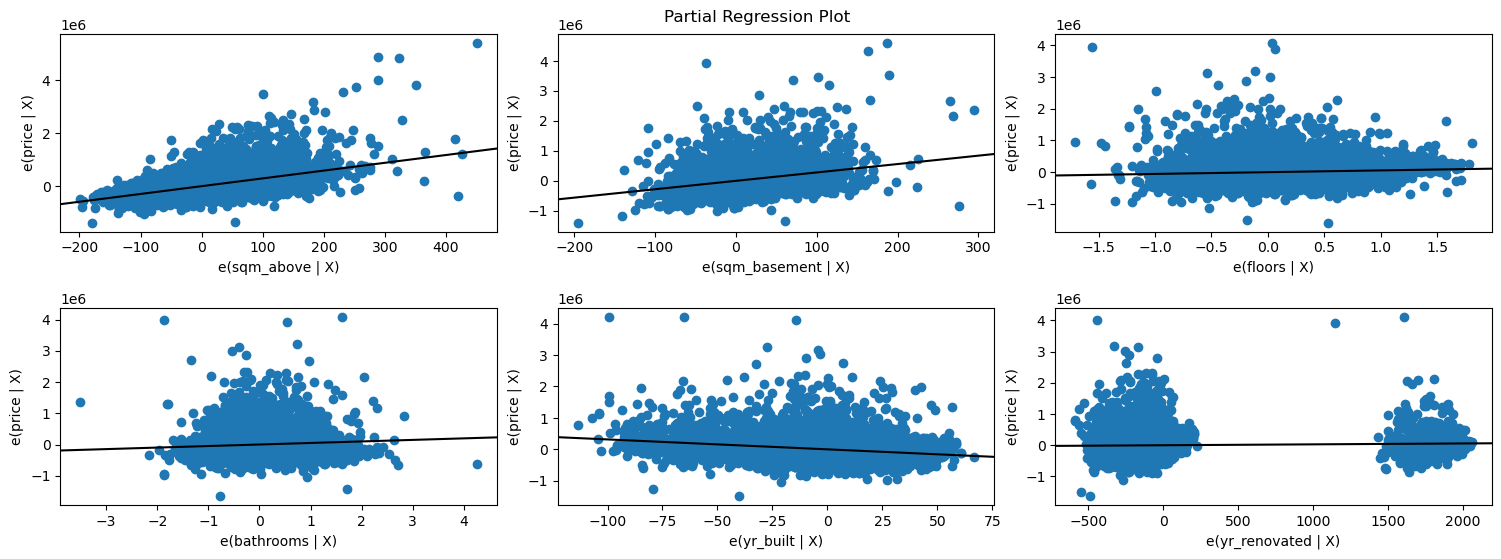

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    X_multi2_results,
    exog_idx=list(df4.columns.values),
    grid=(3,3),
    fig=fig)
plt.show()

With the above visualization we can see variations in the slope. A positive slope suggests a positive relationship between the predictor variable and the response variable. As the predictor variable increases, the response variable tends to increase as well. The steeper the slope, the stronger the relationship.eg sqm_above,sqm_basement

A negative slope indicates an inverse relationship between the predictor variable and the response variable. As the predictor variable increases, the response variable tends to decrease. Similarly, the steeper the negative slope, the stronger the inverse relationship.eg yr_built

A slope of zero implies that there is no linear relationship between the predictor and response variables. In other words, changes in the predictor variable do not result in any changes in the response variable.eg yr_renovated

In [25]:
chng2 = (X_multi2_results.rsquared_adj - baseline_results.rsquared_adj)/baseline_results.rsquared_adj
prcnt_chng2 = chng2 * 100

print(f"""
Baseline model adjusted R-Squared: {baseline_results.rsquared_adj}
Final model adjusted R-Squared: {X_multi2_results.rsquared_adj}
percent change in the adjusted R-Squared: {round(prcnt_chng2,2)}%
""")


Baseline model adjusted R-Squared: 0.3664410103983813
Final model adjusted R-Squared: 0.5365020160723728
percent change in the adjusted R-Squared: 46.41%



From the above cell we can see that adding other variables improves the model significantly.We can also analyse a model involving a dummy variable we created earlier which focused on condition of the house.

In [26]:
print(multi6_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1678.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:59   Log-Likelihood:            -2.9904e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21581   BIC:                         5.982e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.047e+06   1

The additional model built was:

price = 262300 + 120700condition_Very Good - 143400condition_Fair - 129800condition_Poor

The model is statistically significant overall, with an F-statistic p-value below 0.05

The model explains about 7.5% of the variance in price

The model coefficients (const, floors, and condition_Fair) are all statistically significant, with t-statistic p-values below 0.05


1. The expected housing price for condition_average(reference category) with 0 floors is $262300.

2. condition_Very Good has a $120700 higher expected housing price compared to condition_average, holding the number of floors is constant.

3. condition_Fair has a $143400 lower expected housing price compared to condition_average, holding the number of floors is constant

4. The expected price for poor condition cannot be relied on as it's t-statistic p-value is near 0.05 which indicates that the coefficient may or may not be statistically significant at the conventional significance level of 0.05.But if it was considered significant condition_poor has a $129800 lower expected housing price compared to condition_average, holding the number of floors is constant

5. Each additional floor is associated with a $180566.60 increase in the expected housing price, regardless of the condition.

We can also refer to the other neighbourhood ie. the nearest 15 houses.Here we modeled the price against the living space and the year renovated of the nearest 15 houses.

In [27]:
df5 = df2[['sqm_living15','yr_renovated']]
multi5_model = sm.OLS(y, sm.add_constant(df5))
multi5_results = multi5_model.fit()

multi5_results.params

const          -91092.908491
sqm_living15     3376.839433
yr_renovated      118.529972
dtype: float64

As we can see we get a negative intercept which makes interpretation difficult.To calculate a more interpretable intercept we'll shift the predictors so that a value of 0 represents the mean rather than representing 0.

In [28]:
df5_centered = df5.copy()
for col in df5_centered.columns:
    df5_centered[col] = df5_centered[col] - df5_centered[col].mean()

centered_model = sm.OLS(y, sm.add_constant(df5_centered))
df5_centered_results = centered_model.fit()

df5_centered_results.params

const           540296.573506
sqm_living15      3376.839433
yr_renovated       118.529972
dtype: float64

We now have a more meaningful intercept

In [29]:
print(df5_centered_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     5976.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:59   Log-Likelihood:            -3.0263e+05
No. Observations:               21597   AIC:                         6.053e+05
Df Residuals:                   21594   BIC:                         6.053e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.403e+05   2005.698    269.381   

The model built was:

price = 540300 + 3376.84sqm_living15 + 118.53yr_renovated

The model is statistically significant overall, with an F-statistic p-value below 0.05

The model explains about 35.6% of the variance in price

The model coefficients (const, sqm_living15, and yr_renovated) are all statistically significant, with t-statistic p-values below 0.05

1. For the average living area of the nearest 15 neighbours renovated in average year,we would expect it to cost $540296.57.

2. For an increase of 1 square meter relative to the mean of sqm_living15(square meters of the nearest 15 houses), the price increases by $3376.

3. For an increase of 1 year relative to the year of renovation mean, the price increases by $118.53.

eval_env: 1
eval_env: 1


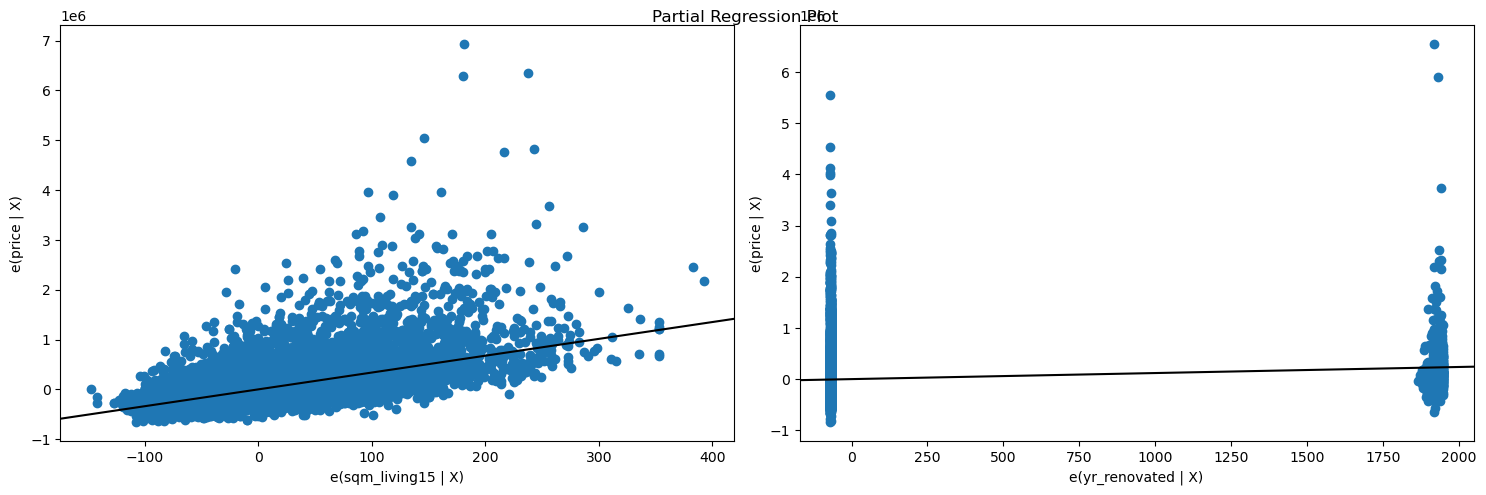

In [30]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    df5_centered_results,
    exog_idx=list(df5_centered.columns.values),
    grid=(1,2),
    fig=fig)
plt.show()

#### Recommendations

1. **Living Area (sqm_above)**: Increasing the living area of the home by one square meter is associated with an estimated increase in price of $2,934.7. For every additional square meter increase in the living area of a house relative to the mean of the living area of the nearest 15 houses, the price is expected to increase by $3,376.  To maximize the estimated value of the property, consider expanding the above ground living space through additions or remodeling.

2. **Basement Area (sqm_basement)**: Increasing the basement area of the home by one square meter is associated with an estimated increase in price of $2,799.72. If your property has a basement or potential for one, renovating or expanding it could positively impact the estimated value of the home.

3. **Number of Floors (floors)**: Each additional floor in the house is associated with an estimated increase in price of $55,510. If feasible and within zoning regulations, consider adding additional floors to the property to potentially increase its value.

4. **Year of Renovation (yr_renovated)**: The year of renovation also affects the price of a house. For every year since the mean year of renovation of the nearest 15 houses, the price is expected to increase by $118.53. This implies that more recently renovated houses tend to have higher prices. If you are considering renovating your house, it's worth keeping in mind that a more recent renovation might contribute to an increased selling price.

5. **Baseline Price**: The intercept term of 262,300 represents the baseline price or estimated value of a property in an average condition (reference category). Its recommended taht one use this baseline price as a starting point when determining the price of a property before considering its condition.

6. **Average living area of nearest 15 renovated neighbors**: The average living area of the nearest 15 renovated neighbors has an impact on the price. If the living area of a house is similar to the average living area of its 15 nearest renovated neighbors, then the expected price would be $540,296.57. Therefore, if you are looking to sell or buy a house, it would be beneficial to consider the living area of neighboring houses that have undergone renovations.



### Limitations

1.  Our model used data that has outliers which may have introduced skewness or non-normality.Outliers distort relationships, bias parameter estimates, reduce model performance, and violate modeling assumptions. Its recommended that one takes precaution while handling outliers because outliers may contain valuable information or represent important phenomena in the data. Removing outliers without a careful understanding of their nature and context can lead to the loss of valuable insights.

2. From our model the year of construction has a negative impact on the estimated price, with an estimated decrease of $3,154.97 per year. This is not feasible as it suggest an increase in year built impacts the price negatively where as the opposite is true. Houses built recently tend to be more expensive that old houses.
